Estatística Frequências e Medidas - Desafio Final

Considerando a base de dados de enem_2023.json responda as questões abaixo (os dados são fictícios).

Você é uma pesquisadora de um cursinho para estudantes que querem ingressar na universidade em 2025. Seu objetivo é retirar informações da base de dados do enem do ano anterior para alinhar melhor as estratégias do cursinho para cada estudante. O dado possui 6 colunas, 5 delas representam as disciplinas do ENEM e uma o gênero das pessoas que fizeram a prova. No dado existe a representação de 1000 pessoas, sendo cada uma delas uma linha.

1. Qual das disciplinas tem a maior amplitude de nota?

In [2]:
#Leitura dos dados

#Bibliotecas base
import pandas as pd
import numpy as np
import json

#Bibliotecas para visualização de dados
import seaborn as sns
import matplotlib.pyplot as plt

#Bibliotecas para estatística
import scipy.stats as stat
import statistics

In [3]:
#Leitura do arquivo json
df = pd.read_json('enem_2023.json')

In [4]:
df.head()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,585.669300,686.512178,390.482473,452.281333,546.371706,Homem
1,359.384608,642.084134,NaN,412.205207,741.825256,Mulher
2,622.732384,495.510719,443.183580,669.683401,684.515750,Homem
3,350.164605,602.041588,413.979810,676.608952,671.237114,Homem
4,384.093657,489.249140,609.758123,520.426698,744.375048,Homem


In [6]:
#Cálculo da amplitude
def describe_new(df):
    df1 = df.describe()
    df1.loc["Amplitude"] = df1.loc['max'] - df1.loc['min']
    return df1


In [7]:
describe_new(df)

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000
Amplitude,517.456317,474.019695,487.604568,488.077902,729.160035


*A amplitude máxima está na disciplina Redação.*

2. Qual é a média e a mediana para cada uma das disciplinas? (Lembre-se de remover todos os valores nulos quando considerar a mediana)

In [8]:
#Verificando quantidade de valores nulos
df.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [9]:
#Verificando o valor da média
df.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [11]:
df.dropna(inplace=True)

In [12]:
#Média
media = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].mean()
media

Linguagens              517.467162
Ciências humanas        528.351454
Ciências da natureza    502.142101
Matemática              537.172480
Redação                 641.193123
dtype: float64

In [13]:
#Mediana
mediana = df[['Linguagens', 'Ciências humanas', 'Ciências da natureza', 'Matemática', 'Redação']].median()
mediana

Linguagens              517.128831
Ciências humanas        528.503263
Ciências da natureza    502.935209
Matemática              532.961486
Redação                 639.602691
dtype: float64

In [14]:
#Verificando se os NAN foram preenchidos
df.isna().sum()

Linguagens              0
Ciências humanas        0
Ciências da natureza    0
Matemática              0
Redação                 0
Sexo                    0
dtype: int64

3. Considerando o curso de Ciência da Computação da UFPE, onde o peso cada uma das disciplinas ponderado:
a. Redação - 2
b. Matemática e suas Tecnologias - 4
c. Linguagens, Códigos e suas Tecnologias - 2
d. Ciências Humanas e suas Tecnologias - 1
e. Ciências da Natureza e suas Tecnologias - 1
Qual o desvio padrão e média das notas dos 500 estudantes mais bem colocados considerando esses pesos?

In [15]:
#Realizando o cálculo da nota final,considerando o peso
notatotalpeso = df['Linguagens']*2 + df['Redação']*2 + df['Matemática']*4 + df['Ciências humanas'] + df['Ciências da natureza']
notatotalpeso = notatotalpeso / 10
notatotalpeso

0      515.020199
2      623.192417
3      576.526064
4      543.765146
5      571.021214
          ...    
990    569.783152
993    511.632278
994    518.940962
996    501.288403
998    492.147194
Length: 548, dtype: float64

In [16]:
df['Média Total'] = notatotalpeso

#Realizando ordenação das notas
df_ordenado = df.sort_values(by='Média Total', ascending=False)

#Mostrando o top 500
top500 = df_ordenado.head(500)
top500


,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Total
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
...,...,...,...,...,...,...,...
400,515.892318,398.431513,440.731835,522.484700,478.946903,Homem,491.878059
160,539.397184,608.405447,314.400000,507.648230,440.950905,Mulher,491.409454
529,416.114140,438.110249,429.881954,462.605411,679.843696,Mulher,491.032952
386,537.838737,570.471430,584.935736,437.841844,459.122741,Homem,490.069750


In [17]:
#Cálculo do desvio padrão do top 500
top500['Média Total'].std()

40.435866299464266

In [18]:
#Cálculo da média ponderada. Como foi feito a soma da nota considerando o peso, será aplicado apenas o método mean
top500['Média Total'].mean()

557.2896772018769

4. Se todos esses estudantes aplicassem para ciência da computação e existem apenas 40 vagas, qual seria a variância e média da nota dos estudantes que entraram no curso de ciência da computação?

In [19]:
#Considerando 40 vagas, calculei o top 40 utilizando a nota com os pesos calculada no exercício anterior
top40 = df_ordenado.head(40)
top40

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo,Média Total
25,604.825455,447.532353,523.041011,727.181224,870.464077,Mulher,682.987732
824,533.812379,611.760520,494.994598,807.877902,697.570213,Não idenficado,680.103191
702,551.398112,637.818208,451.624683,803.769938,652.669636,Homem,671.265814
129,583.015454,434.261543,588.516699,687.621711,852.273821,Mulher,664.384364
60,498.394660,668.355060,457.371963,760.136151,711.458481,Mulher,658.597791
880,671.524266,590.780179,546.595272,571.607337,909.379934,Homem,658.561320
376,364.096042,582.024626,523.764760,749.912621,872.188740,Não idenficado,657.800943
989,462.051713,512.986241,506.405210,787.771672,692.814673,Homem,648.021091
694,497.493880,609.839007,528.413513,737.175029,693.739043,Mulher,646.941848
965,660.913894,613.882660,433.935910,580.908082,881.465882,Mulher,645.621045


In [20]:
#Realizando o cálculo da variância (desvio padrão ao quadrado)
variancia = top40['Média Total'].std()*top40['Média Total'].std()
variancia

295.76750360041035

In [21]:
#Realizando o cálculo da média ponderada do top 40
media_40 = top40['Média Total'].mean()
media_40

636.6827415075188

5. Qual o valor do teto do terceiro quartil para as disciplinas de matemática e linguagens?

In [22]:
#Verificando o valor da mediana das notas de Matemática e Linguagens
media_quartil = df[['Matemática', 'Linguagens']].median()
media_quartil

Matemática    532.961486
Linguagens    517.128831
dtype: float64

In [23]:
#Criação dos quartis para visualização da disciplina de Matemática
df_matematica = df['Matemática']
matem_quartil = np.quantile(df_matematica, [0, 0.25, 0.5, 0.75, 1])
matem_quartil

array([319.8       , 477.0184711 , 532.96148554, 591.33524744,
       807.87790189])

In [24]:
#Criação da variável para visualização dos quartis com as duas disciplinas juntas
df_quartil = df[['Matemática', 'Linguagens']]
quartis = np.quantile(df_quartil, [0, 0.25, 0.5, 0.75, 1])
quartis

array([287.        , 467.6256889 , 524.74686941, 581.57348791,
       807.87790189])

*O valor do teto do terceiro quartil para Matemática é 591.34.
O valor do teto do terceiro quartil para Linguagens é 572.65.*

6. Faça o histograma de Redação e Linguagens, de 20 em 20 pontos. Podemos dizer que são histogramas simétricos, justifique e classifique se não assimétricas?

<Figure size 800x1000 with 0 Axes>

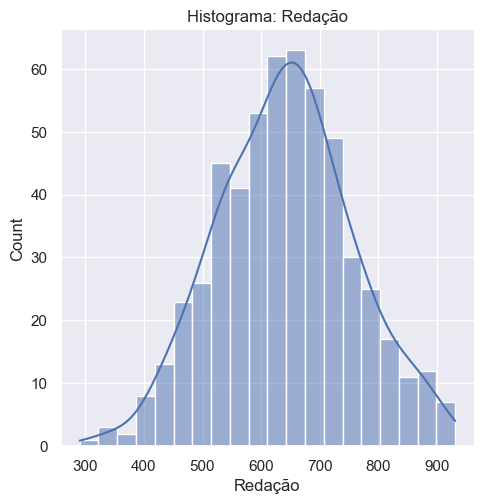

<Figure size 800x1000 with 0 Axes>

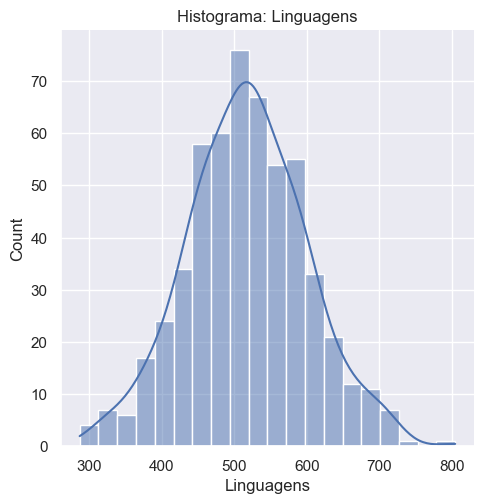

In [25]:
#Selecionando as colunas para exibir o histograma

histo_red_ling = df[['Redação', 'Linguagens']]

plt.rcParams['figure.figsize'] = [8, 10]
sns.set_theme()
# create distplots
for column in histo_red_ling.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.displot(data = histo_red_ling , x = column, kde= True, bins=20)
    plt.title("Histograma: "+column)

Os dois histogramas possuem certa simetria por conta da distribuição da média e do desvio padrão. O pico também está localizado no meio do histograma.

7. Agora coloque um range fixo de 0 até 1000, você ainda tem a mesma opinião quanto a simetria? [plt.hist(dado, bins=_, range=[0, 1000])

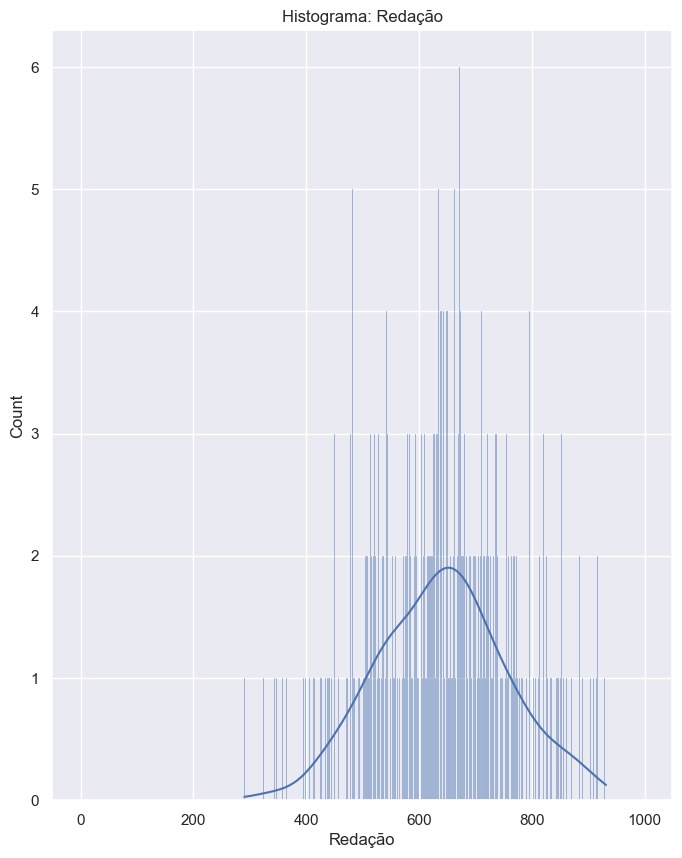

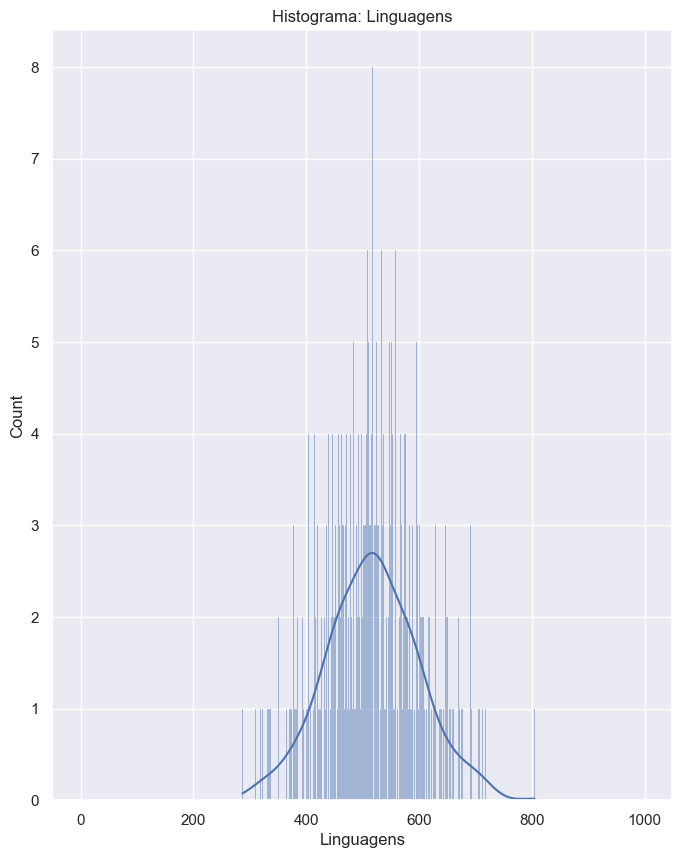

In [26]:
plt.rcParams['figure.figsize'] = [8, 10]
# create distplots
for column in histo_red_ling.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.histplot(histo_red_ling[column], bins = range(0,1000), kde = True)
    plt.title("Histograma: "+column)

Com o atributo range é possível enxergar melhor a assimetria para a esquerda do primeiro histograma e a simetria do segundo histograma.

8. Faça um boxplot do quartil de todas as disciplinas de ciências da natureza e redação. É possível enxergar outliers? Utilize o método IQR.

In [27]:
#Realizando o cálculo do IQR
df_iqr = df[['Ciências da natureza', 'Redação']]

def find_outlier_iqr(dataset, colname):
    q25, q75 = np.quantile(dataset[colname], 0.25), np.quantile(dataset[colname], 0.75)
    iqr = q75 - q25
    #Cálculo de outlier cutoff
    cut_off = iqr * 1.5
    #Cálculo das margens inferiores, lower e superiores upper
    lower, upper = q25 - cut_off, q75 + cut_off
    print(' IQR é ', iqr)
    print('Valor mínimo', lower)
    print('Valor máximo', upper)
    outliers = []

    for i in dataset[colname].values:
        if((i > upper) or (i < lower)):
            outliers.append(i)
    print('O número de outliers encontrado foi de', len(outliers))
    return lower, upper, outliers

 IQR é  102.26240025932503
Valor mínimo 296.6045346095625
Valor máximo 705.6541356468626
O número de outliers encontrado foi de 2
 IQR é  157.02513490047488
Valor mínimo 322.98725564181274
Valor máximo 951.0877952437122
O número de outliers encontrado foi de 1


<Figure size 1000x600 with 0 Axes>

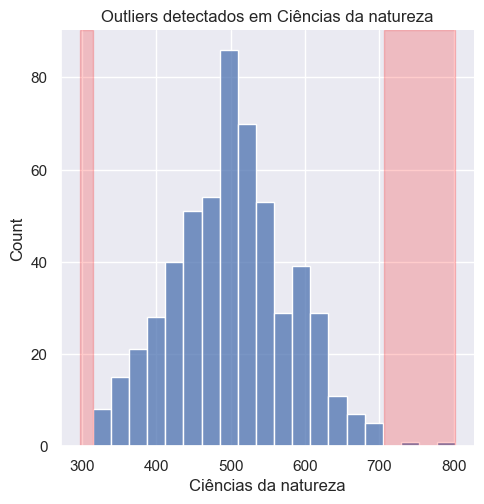

<Figure size 1000x600 with 0 Axes>

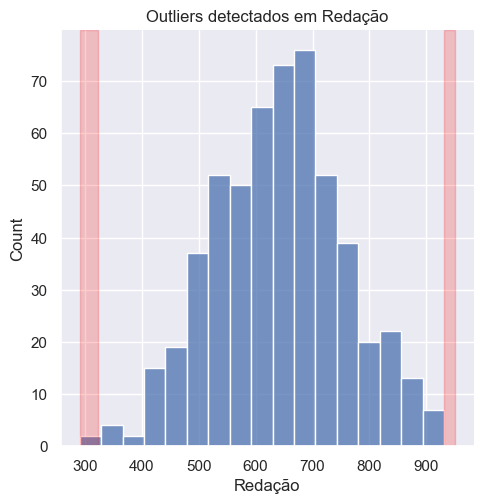

In [29]:
for column in df_iqr.select_dtypes(include=np.number).columns:
    lower, upper, out = find_outlier_iqr(df_iqr, column)
    if (len(out) > 0):
        plt.figure(figsize=(10,6))
        sns.displot(df_iqr[column], kde=False)
        plt.axvspan(xmin = lower, xmax = df_iqr[column].min(), alpha = 0.2, color = 'red')
        plt.axvspan(xmin = upper, xmax = df_iqr[column].max(), alpha = 0.2, color = 'red')
        plt.title("Outliers detectados em {}".format(column))

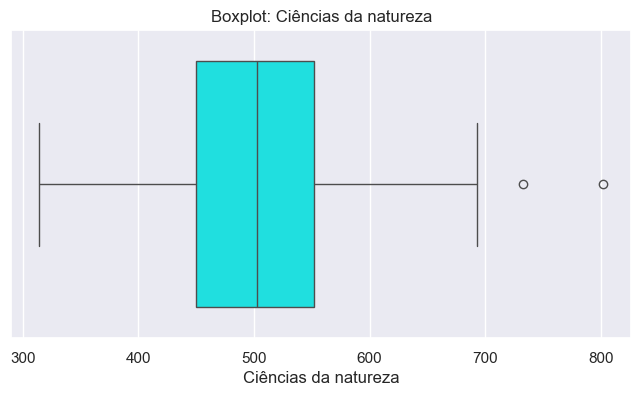

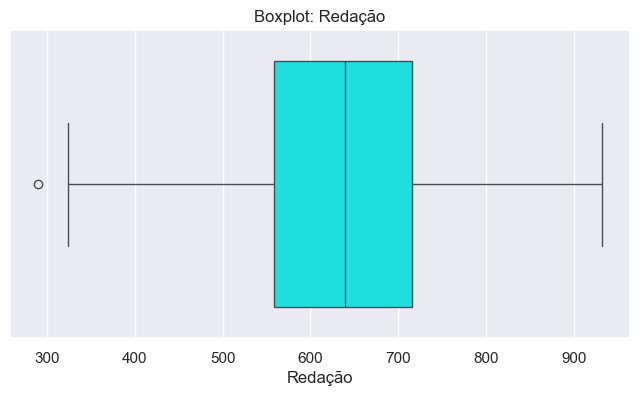

In [30]:
#Bloxplot nas colunas

plt.rcParams['figure.figsize'] = [8,4]
sns.set_theme()

for column in df_iqr.select_dtypes(include=np.number).columns:
    plt.figure()
    sns.boxplot(data = df_iqr, x = column, color = 'cyan', showfliers=True)
    plt.title("Boxplot: " + column)

Após análise do IQR e plotagem dos boxplots, foi observado que Ciências da Natureza possui 2 outliers e Redação possui 1 outlier, provavelmente por conta de notas que saíram acima da média.

9. Remova todos os outliers e verifique se eles são passíveis de alterar a média nacional significativamente? (considere significativamente um valor acima de 5%)

In [43]:
#Utilização do drop NA para remover outliers
def replace_na_outlier_zscore(dataset, threshold, colname):
    dados = dataset[colname]
    outliers = []
    zscore = []
    val = []
    threshold = threshold
    mean = np.mean(dados)
    std = np.std(dados)
    for i in dados.values:
        z_score = (i - mean)/std
        zscore.append(z_score)
        if np.abs(z_score) > threshold:
            outliers.append(i)
            val.append(np.nan)
        else:
            val.append(i)

    return val

In [44]:
#Removendo outliers
def drop_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, 3, column)
    return dataset.dropna()

In [45]:
#Trocando os NaNs pela mediana
def replace_median_outliers(dataset, threshold):
    for column in dataset.select_dtypes(include=np.number).columns:
        dataset[column] = replace_na_outlier_zscore(dataset, 3, column)
    return dataset.fillna(dataset.median(numeric_only=True))

In [46]:
dfenem_zscore_na = drop_outliers(df, 3)


In [47]:
dfenem_zscore_median = replace_median_outliers(df, 3)
dfenem_zscore_median[['Ciências da natureza', 'Redação']].describe()

,Ciências da natureza,Redação
count,548.000000,548.000000
mean,501.596255,641.830547
std,77.362601,114.598973
min,314.400000,324.222553
25%,449.998135,559.859196
50%,502.881064,639.616833
75%,549.611418,715.550093
max,732.502964,931.305275


In [48]:
df_iqr.describe()

,Ciências da natureza,Redação
count,548.000000,548.000000
mean,502.142101,641.193123
std,78.419720,115.578585
min,314.400000,290.308608
25%,449.998135,558.524958
50%,502.935209,639.602691
75%,552.260535,715.550093
max,802.004568,931.305275


In [49]:
df_iqr.mean()/dfenem_zscore_median[['Ciências da natureza', 'Redação']].mean()

Ciências da natureza    1.001088
Redação                 0.999007
dtype: float64

*Foi verificado que os outliers não foram passíveis de alterar a média*

10. Considerando valores nulos, tente encontrar qual seria a melhor medida de tendência que pode substituir as notas nulas. Média, moda ou mediana? Substitua o valor por todos os três e diga qual delas altera menos a média geral e o desvio padrão.

In [50]:
#Nova leitura do arquivo json para contar valores nulos
df_nulos = pd.read_json('enem_2023.json')

In [51]:
df_nulos.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,860.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,84.009313,77.811519,78.760404,86.648100,115.339972
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.468366
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,571.635876,581.401952,548.751678,592.912963,715.989868
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [52]:
#Verificação dos valores nulos
df_nulos.isna().sum()

Linguagens              103
Ciências humanas         64
Ciências da natureza    176
Matemática               76
Redação                 140
Sexo                      0
dtype: int64

In [53]:
#Cálculo da média, considerando os valores nulos
nulosmedia = df_nulos.mean()
nulosmedia

<ipython-input-53-57d2eb36a768>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nulosmedia = df_nulos.mean()


Linguagens              514.524809
Ciências humanas        527.042281
Ciências da natureza    499.315583
Matemática              535.965660
Redação                 637.783532
dtype: float64

In [54]:
#Cálculo da média, substituindo nulos pela média
df_preenchido_media = df_nulos.fillna(nulosmedia)
df_preenchido_media.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.524809,527.042281,499.315583,535.965660,637.783532
std,79.560718,75.277806,71.486677,83.286987,106.953175
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,514.524809,527.042281,499.315583,535.965660,637.783532
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [55]:
#Cálculo da moda, considerando os valores nulos
nulosmoda = df_nulos.mode()
nulosmoda

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação,Sexo
0,287.0,289.9,314.4,319.8,270.839965,Homem
1,NaN,NaN,NaN,NaN,290.308608,NaN
2,NaN,NaN,NaN,NaN,324.222553,NaN
3,NaN,NaN,NaN,NaN,343.898504,NaN
4,NaN,NaN,NaN,NaN,347.897227,NaN
...,...,...,...,...,...,...
855,NaN,NaN,NaN,NaN,928.835434,NaN
856,NaN,NaN,NaN,NaN,929.654524,NaN
857,NaN,NaN,NaN,NaN,931.305275,NaN
858,NaN,NaN,NaN,NaN,981.016553,NaN


In [56]:
#Cálculo da moda, substituindo nulos pela moda
df_preenchido_moda = df_nulos.fillna(nulosmoda)
df_preenchido_moda.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,897.000000,936.000000,824.000000,924.000000,976.000000
mean,514.524809,527.042281,499.315583,535.965660,637.815381
std,84.009313,77.811519,78.760404,86.648100,114.038611
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,458.360558,475.424546,444.709076,479.172971,556.930700
50%,515.045250,524.519920,500.479263,533.247767,635.169149
75%,571.635876,581.401952,548.751678,592.912963,711.712186
max,804.456317,763.919695,802.004568,807.877902,1000.000000


In [ ]:
#Cálculo da mediana, considerando os valores nulos
nulosmediana = df_nulos.median()
nulosmediana

<ipython-input-117-47ab04466037>:2: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  nulosmediana = df_nulos.median()


Linguagens              515.045250
Ciências humanas        524.519920
Ciências da natureza    500.479263
Matemática              533.247767
Redação                 635.273973
dtype: float64

In [ ]:
#Cálculo da mediana, substituindo nulos pela mediana
df_preenchido_mediana = df_nulos.fillna(nulosmediana)
df_preenchido_mediana.describe()

,Linguagens,Ciências humanas,Ciências da natureza,Matemática,Redação
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,514.578415,526.880850,499.520391,535.759100,637.432194
std,79.560876,75.280340,71.488051,83.290104,106.956723
min,287.000000,289.900000,314.400000,319.800000,270.839965
25%,464.362445,479.418513,459.456673,485.234093,571.697962
50%,515.045250,524.519920,500.479263,533.247767,635.273973
75%,564.793722,576.696971,536.724816,586.927627,699.972897
max,804.456317,763.919695,802.004568,807.877902,1000.000000


Abaixo listei os valores após tratamento de valores nulos e cálculo das funções solicitadas para a disciplina Linguagens, por exemplo. Observei que a moda foi o que alterou ou quase nada os resultados.

data frame original
std 84.009313
mean 514.5244809

data frame pós média
std 79.560718
mean 514.524809

data frame pós moda
std 84.009313
mean 514.5244809

data frame pós mediana
std 59.560876
mean 514.578415
